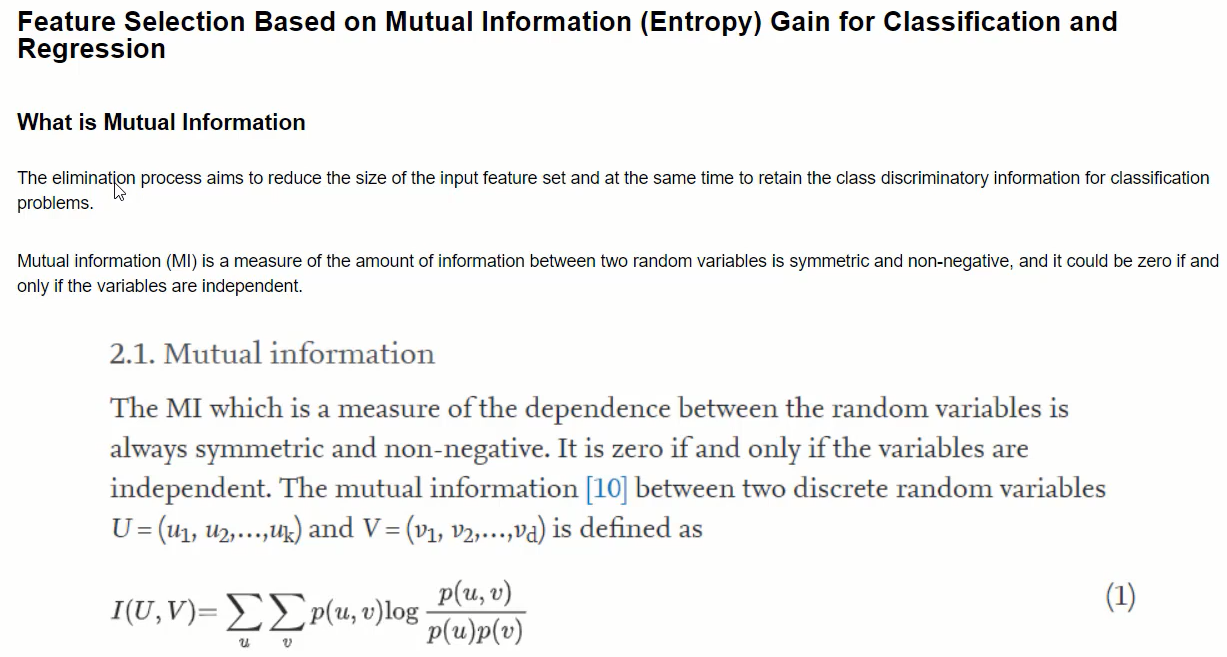

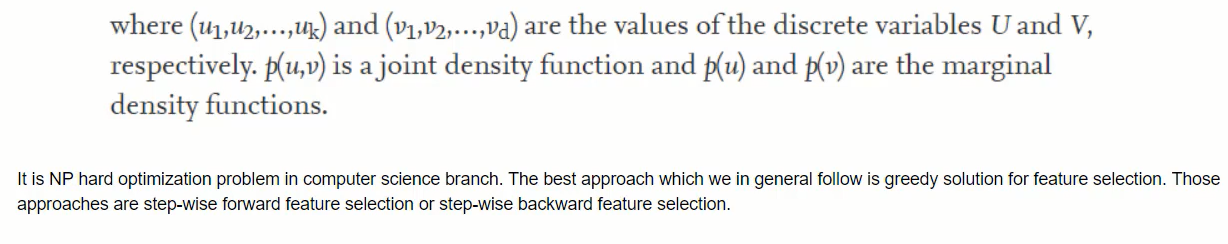

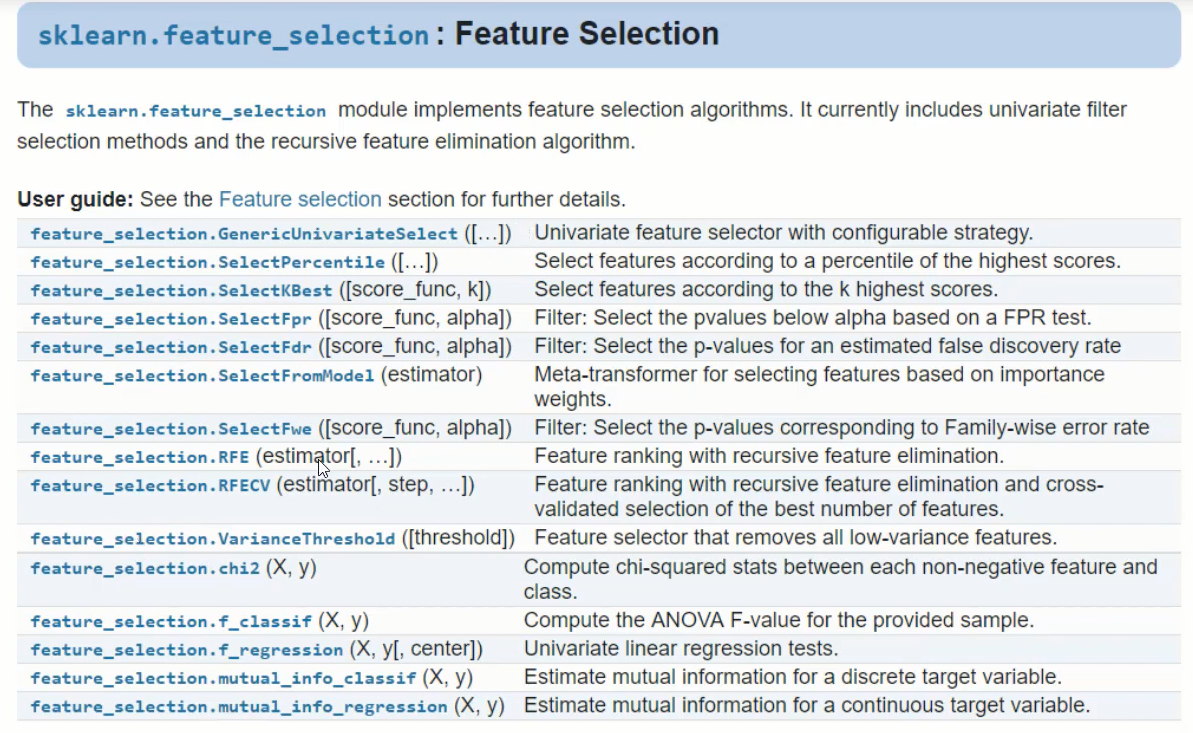

# 1. Classification Problem

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [4]:
data = pd.read_csv('C:/Users/dell/Downloads/Data-Files-for-Feature-Selection-master/Data-Files-for-Feature-Selection-master/santander-train.csv', nrows=20000)

In [5]:
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                        0                        0  ...   
1                        0                        0  ...   
2                        0                        0  ...   
3                        0                        0  ...   
4                        0                        0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [6]:
data.shape

(20000, 371)

In [7]:
X = data.drop(['TARGET'], axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## Remove constant, quasi constant and duplicate features

### 1. Remove constant Features

In [10]:
constant_filter = VarianceThreshold(threshold = 0)
constant_filter.fit(X_train)
## Apply transform on training dataset to avoid overfitting and to remove constant features
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [17]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 291), (4000, 291), (16000, 370))

### 2. Remove duplicate features

In [12]:
# Transpose(T) the latest dataset -> convert to nparray
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [13]:
# COnvert nparray to pandas dataframe
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [14]:
# Check no of duplicate features
X_train_T.duplicated().sum()

25

In [15]:
duplicated_features = X_train_T.duplicated() # get duplicated features
features_to_keep = [not index for index in duplicated_features] # get not duplicated features

In [16]:
# Reverse transpose the features data
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [19]:
X_train_unique.shape, X_test_unique.shape, X_train.shape

((16000, 266), (4000, 266), (16000, 370))

## Calculate the Mutual Information Gain 

In [20]:
mi = mutual_info_classif(X_train_unique, y_train)

In [21]:
len(mi) # MI for all the features -> Higher the information of specific feature -> Higher importance

266

In [22]:
# Convert data to series
mi = pd.Series(mi)
mi.index = X_train_unique.columns
mi.sort_values(ascending=False, inplace=True )

<AxesSubplot:>

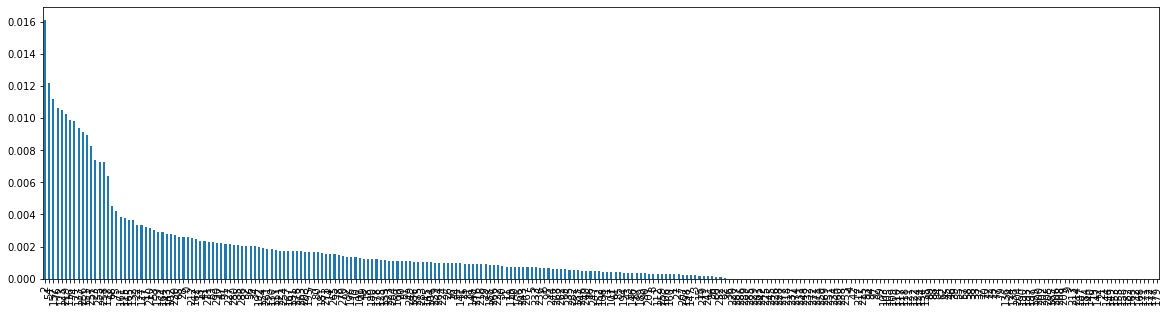

In [23]:
mi.plot.bar(figsize=(20,5))

## Observation: More than 50% of the features don't have enouf importance and information

In [29]:
# select to 10% of the features and discard rest
sel = SelectPercentile(mutual_info_classif, percentile=10)
sel.fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  23,  32,  53,  54,  74,  75,  76,  88, 115, 116, 123, 132,
            133, 137, 151, 157, 159, 218, 219, 255, 256, 257, 258, 265, 269,
            270],
           dtype='int64')

In [31]:
len(X_train_unique.columns[sel.get_support()])

27

In [32]:
help(sel)

Help on SelectPercentile in module sklearn.feature_selection._univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  SelectPercentile(score_func=<function f_classif at 0x0000021BE70ACD30>, *, percentile=10)
 |  
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable, default=f_classif
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See Also"). The default function only
 |      works with classification tasks.
 |  
 |      .. versionadded:: 0.18
 |  
 |  percentile : int, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of shape (n_features,)
 |      p-values of 

In [37]:
## Apply transform on training dataset to avoid overfitting
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [38]:
X_train_mi.shape, X_test_mi.shape, X_train.shape

((16000, 27), (4000, 27), (16000, 370))

## Build ML model and compare the performance of the selected features

In [39]:
# Function to calculate random forest ML accuracy
def run_random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on test set")
    print(accuracy_score(y_test, y_pred))

In [40]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_mi, X_test_mi, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")


Accuracy on test set
0.95925
Time: 2.109272003173828


In [41]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy on test set
0.9585
Time: 4.2156171798706055


# 2. Regression Problem

In [42]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
boston = load_boston()

In [44]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [46]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace=True)

In [50]:
mi # Top Selected Features

LSTAT      0.682607
RM         0.559994
INDUS      0.511665
PTRATIO    0.479231
NOX        0.450923
TAX        0.390938
CRIM       0.361503
AGE        0.342460
DIS        0.321015
RAD        0.205723
ZN         0.204880
B          0.150691
CHAS       0.017712
dtype: float64

<AxesSubplot:>

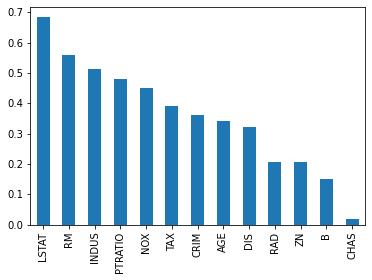

In [51]:
mi.plot.bar()

In [53]:
# Select top 9 features
sel = SelectKBest(mutual_info_regression, k=9)
sel.fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

## Build ML model and compare the performance of the selected features

In [54]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)
y_pred = linearRegressionModel.predict(X_test)

In [56]:
r2_score(y_test, y_pred)

0.5892223849182507

In [57]:
# Calculate Root mean squared error(RMSE)
np.sqrt(mean_squared_error(y_test, y_pred))

5.783509315085135

In [58]:
np.std(y)

9.188011545278203

In [63]:
## Calculate the performance on the basis of selected features and avoid overfitting
X_train_9 = sel.transform(X_train)
X_test_9 = sel.transform(X_test)
X_train_9.shape, X_test_9.shape

((404, 9), (102, 9))

In [64]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train_9, y_train)
y_pred = linearRegressionModel.predict(X_test_9)

In [65]:
r2_score(y_test, y_pred)

0.531712760696157

In [66]:
# Calculate Root mean squared error(RMSE)
np.sqrt(mean_squared_error(y_test, y_pred))

6.175103151293751